# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [83]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import datetime 
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [145]:
# Importing the file porter_data_1.csv
dataframe = pd.read_csv(r"D:\Savitri\stats\Linear-Regression-main\Assignment\Delivery_Starter\porter_data_1.csv")
dataframe.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [146]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
dataframe['created_date_time'] = pd.to_datetime(dataframe.created_at)
dataframe['actual_delivery_date_time'] = pd.to_datetime(dataframe.actual_delivery_time)

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [147]:
# Convert categorical features to category type



#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [148]:
# Calculate time taken in minutes
result = []
for (actual, created) in zip(dataframe.actual_delivery_date_time, dataframe.created_date_time):
    duration = actual - created
    result.append(duration)
    
dataframe['time_for_delivery'] = result

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [149]:
# Extract the hour and day of week from the 'created_at' timestamp
dataframe['delivery_time_in_min'] = dataframe['time_for_delivery'] / pd.Timedelta(minutes=1)
dataframe['creation_hour'] = dataframe['created_date_time'].dt.hour

# Create a categorical feature 'isWeekend'
def isweekend(day):
    if day == 6 or day == 7:
        return 1
    else:
        return 0

dataframe['isWeekend'] = dataframe['created_date_time'].apply(lambda x: isweekend(x.weekday() + 1))

In [150]:
def GetDay(day) :
    match day:
        case 1:
            return "Monday"
        case 2:
            return "Tuesday"
        case 3:
            return "Wednesday"
        case 4:
            return "Thursday"
        case 5:
            return "Friday"
        case 6:
            return "Saturday"
        case 7:
            return "Sunday"

dataframe.head()
dataframe['day_of_the_week'] = dataframe['created_date_time'].apply(lambda x: x.weekday() + 1)

In [ ]:
def GetMonth(month) :
    match month:
        case 1:
            return "January"
        case 2:
            return "February"
        case 3:
            return "March"
        case 4:
            return "April"
        case 5:
            return "May"
        case 6:
            return "June"
        case 7:
            return "July"
        case 8:
            return "August"
        case 9:
            return "September"
        case 10:
            return "October"
        case 11:
            return "November"
        case 12:
            return "December"

dataframe['month'] = dataframe['created_date_time'].dt.month
dataframe['month'] = dataframe['month'].apply(lambda x: x)

In [158]:
dataframe['date'] = dataframe['created_date_time'].dt.day

In [160]:
dataframe.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,distance,created_date_time,actual_delivery_date_time,time_for_delivery,delivery_time_in_min,creation_hour,isWeekend,day_of_the_week,month,date
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,...,34.44,2015-02-06 22:24:17,2015-02-06 23:11:17,0 days 00:47:00,47.0,22,0,5,2,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,...,27.60,2015-02-10 21:49:25,2015-02-10 22:33:25,0 days 00:44:00,44.0,21,0,2,2,10
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,...,11.56,2015-02-16 00:11:35,2015-02-16 01:06:35,0 days 00:55:00,55.0,0,0,1,2,16
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,...,31.80,2015-02-12 03:36:46,2015-02-12 04:35:46,0 days 00:59:00,59.0,3,0,4,2,12
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,...,8.20,2015-01-27 02:12:36,2015-01-27 02:58:36,0 days 00:46:00,46.0,2,0,2,1,27


In [161]:
# Drop unnecessary columns
dataframe = dataframe.drop('actual_delivery_time', axis =1 )
dataframe = dataframe.drop('store_primary_category', axis =1 )
dataframe = dataframe.drop('time_for_delivery', axis =1 )
dataframe = dataframe.drop('created_at', axis =1 )

In [162]:
dataframe.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_date_time,actual_delivery_date_time,delivery_time_in_min,creation_hour,isWeekend,day_of_the_week,month,date
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,2015-02-06 22:24:17,2015-02-06 23:11:17,47.0,22,0,5,2,6
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,2015-02-10 21:49:25,2015-02-10 22:33:25,44.0,21,0,2,2,10
2,2.0,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,2015-02-16 00:11:35,2015-02-16 01:06:35,55.0,0,0,1,2,16
3,1.0,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,2015-02-12 03:36:46,2015-02-12 04:35:46,59.0,3,0,4,2,12
4,1.0,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,2015-01-27 02:12:36,2015-01-27 02:58:36,46.0,2,0,2,1,27


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [163]:
# Define target variable (y) and features (X) delaying this untill EDS is done as X,y length does not match
#y = dataframe.pop('delivery_time_in_min')
#X = dataframe

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [164]:
# Split data into training and testing sets delaying this untill EDS is done as X,y length does not match
#df_train, df_test = train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = 100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [165]:
# Define numerical and categorical columns for easy EDA and data manipulation



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [166]:
# Plot distributions for all numerical columns
result = dataframe.corr(numeric_only=True)

In [167]:
dataframe.corr(numeric_only=True)

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_time_in_min,creation_hour,isWeekend,day_of_the_week,month,date
market_id,1.000000,-0.013340,0.003567,-0.000724,0.015506,-0.010939,-0.007260,0.074289,0.065351,0.068223,0.019141,-0.073016,-0.008421,-0.000558,-0.000680,0.017249,-0.010876
order_protocol,-0.013340,1.000000,0.007305,-0.051889,-0.023943,-0.043845,-0.090518,0.147408,0.152001,0.136881,-0.009994,-0.136755,0.012601,-0.000568,0.000701,0.003930,-0.004112
total_items,0.003567,0.007305,1.000000,0.554951,0.758339,-0.389471,-0.053749,0.032087,0.029084,0.034818,0.006589,0.224856,-0.070399,0.029398,0.022422,-0.001297,0.001983
subtotal,-0.000724,-0.051889,0.554951,1.000000,0.680842,0.038778,0.509787,0.131239,0.126150,0.130481,0.038156,0.413267,-0.190739,0.048313,0.032832,-0.003001,0.005955
num_distinct_items,0.015506,-0.023943,0.758339,0.680842,1.000000,-0.446503,0.047113,0.065793,0.060508,0.067730,0.024535,0.312055,-0.118982,0.044081,0.030547,0.000366,0.000608
min_item_price,-0.010939,-0.043845,-0.389471,0.038778,-0.446503,1.000000,0.541522,0.042655,0.044311,0.041478,0.004464,0.022753,-0.051824,0.000760,-0.001013,0.000396,0.000718
max_item_price,-0.007260,-0.090518,-0.053749,0.509787,0.047113,0.541522,1.000000,0.133786,0.131835,0.131364,0.029366,0.255167,-0.189802,0.045523,0.030017,0.004328,-0.000656
total_onshift_dashers,0.074289,0.147408,0.032087,0.131239,0.065793,0.042655,0.133786,1.000000,0.943725,0.936121,0.045269,0.171015,-0.375090,0.090487,0.103070,0.024435,0.007435
total_busy_dashers,0.065351,0.152001,0.029084,0.126150,0.060508,0.044311,0.131835,0.943725,1.000000,0.932826,0.043948,0.206045,-0.350589,0.109332,0.086077,-0.047722,0.058691
total_outstanding_orders,0.068223,0.136881,0.034818,0.130481,0.067730,0.041478,0.131364,0.936121,0.932826,1.000000,0.039147,0.384999,-0.362577,0.115899,0.087496,0.044760,-0.016047


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

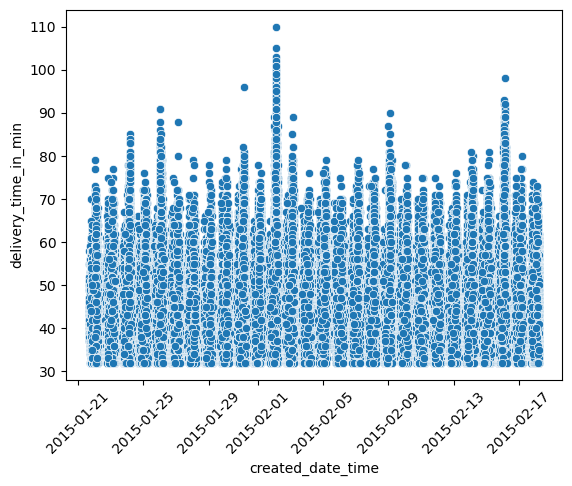

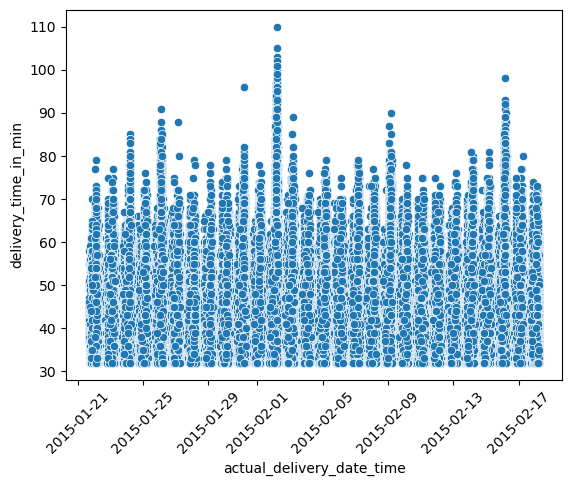

In [168]:
# Distribution of categorical columns
#df_train.info()
plt.xticks(rotation=45)
#plt.subplot(1,2,1)
sns.scatterplot(x = 'created_date_time', y = 'delivery_time_in_min', data = dataframe)
plt.show()
#plt.subplot(1,2,2)

plt.xticks(rotation=45)
sns.scatterplot(x = 'actual_delivery_date_time', y = 'delivery_time_in_min', data = dataframe)
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [169]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   market_id                  175777 non-null  float64       
 1   order_protocol             175777 non-null  float64       
 2   total_items                175777 non-null  int64         
 3   subtotal                   175777 non-null  int64         
 4   num_distinct_items         175777 non-null  int64         
 5   min_item_price             175777 non-null  int64         
 6   max_item_price             175777 non-null  int64         
 7   total_onshift_dashers      175777 non-null  float64       
 8   total_busy_dashers         175777 non-null  float64       
 9   total_outstanding_orders   175777 non-null  float64       
 10  distance                   175777 non-null  float64       
 11  created_date_time          175777 non-null  datetime

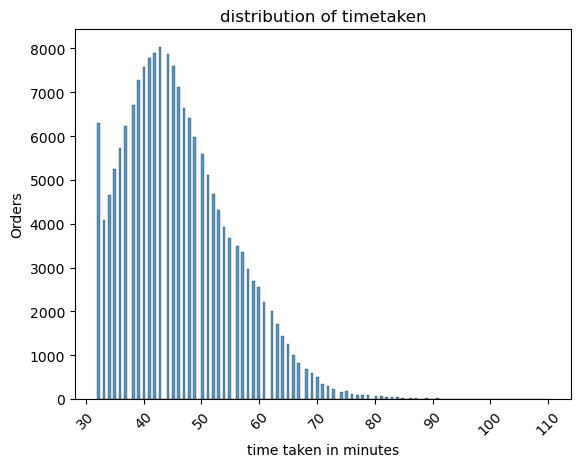

In [170]:
# Distribution of time_taken
plt.title('distribution of timetaken')
plt.xlabel('time taken in minutes')
plt.ylabel('Orders')
plt.xticks(rotation=45)
sns.histplot(dataframe['delivery_time_in_min'])
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

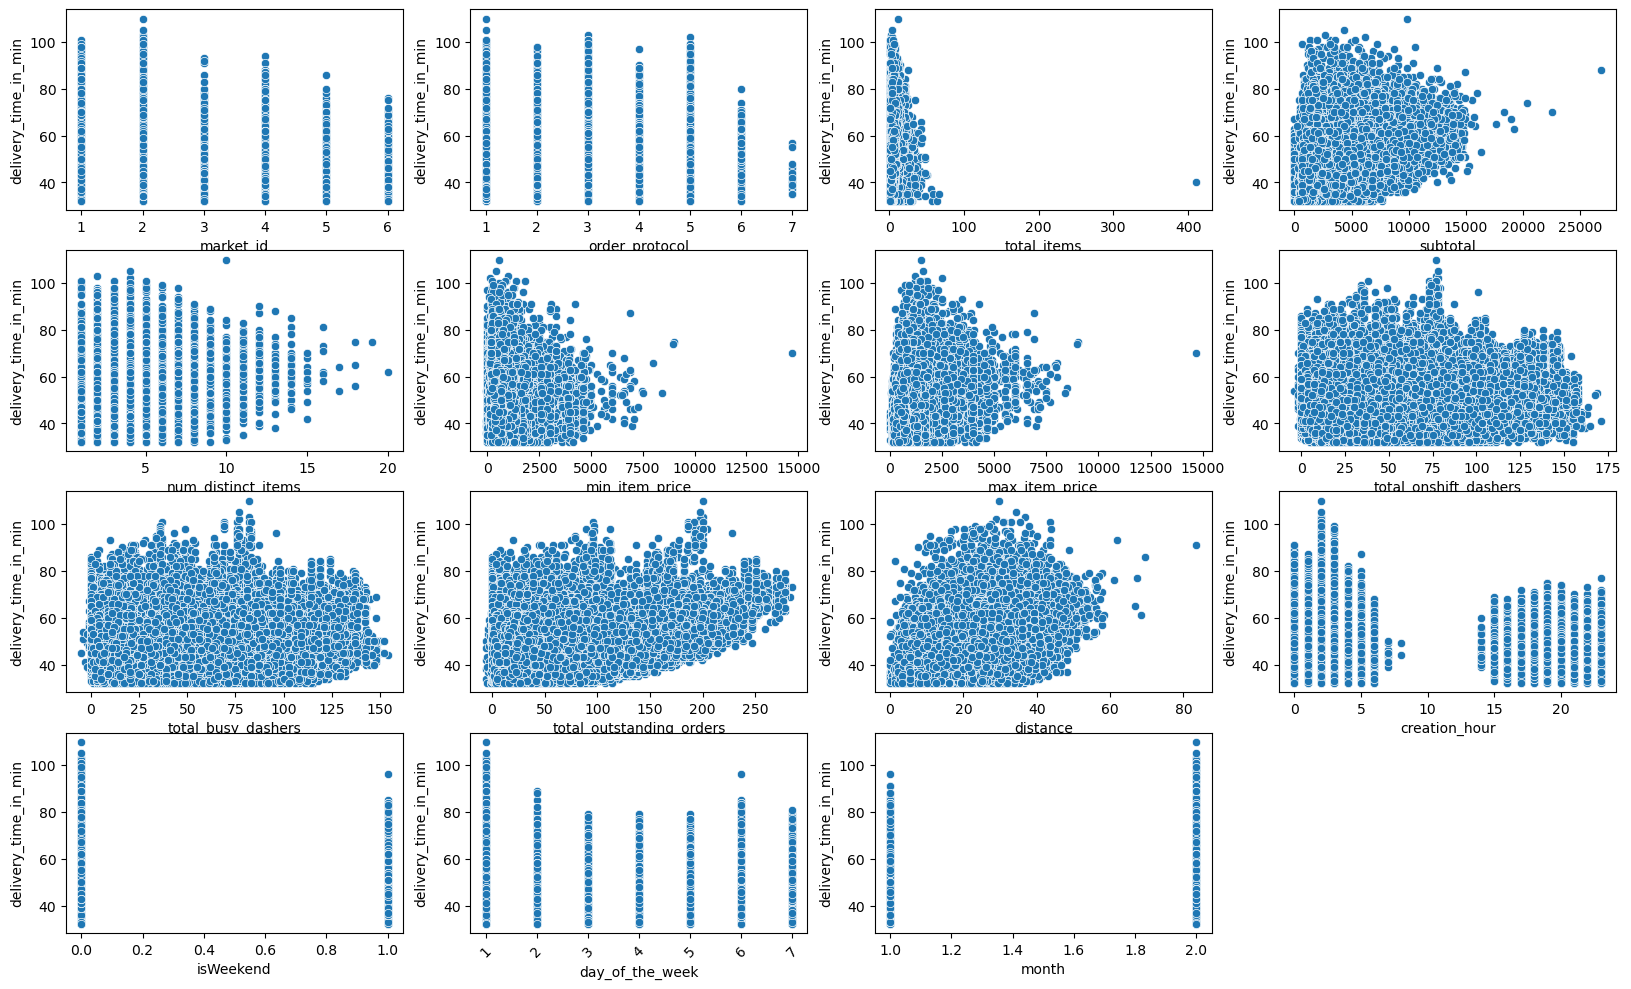

In [171]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(20, 12))
plt.subplot(4,4,1)
sns.scatterplot(x = 'market_id', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,2)
sns.scatterplot(x = 'order_protocol',  y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,3)
sns.scatterplot(x = 'total_items', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,4)
sns.scatterplot(x = 'subtotal', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,5)
sns.scatterplot(x = 'num_distinct_items', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,6)
sns.scatterplot(x = 'min_item_price',  y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,7)
sns.scatterplot(x = 'max_item_price', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,8)
sns.scatterplot(x = 'total_onshift_dashers', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,9)
sns.scatterplot(x = 'total_busy_dashers', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,10)
sns.scatterplot(x = 'total_outstanding_orders', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,11)
sns.scatterplot(x = 'distance', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,12)
sns.scatterplot(x = 'creation_hour', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,13)
sns.scatterplot(x = 'isWeekend', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,14)
plt.xticks(rotation=45)
sns.scatterplot(x = 'day_of_the_week', y = 'delivery_time_in_min', data = dataframe)
plt.subplot(4,4,15)
sns.scatterplot(x = 'month', y = 'delivery_time_in_min', data = dataframe)
plt.show()

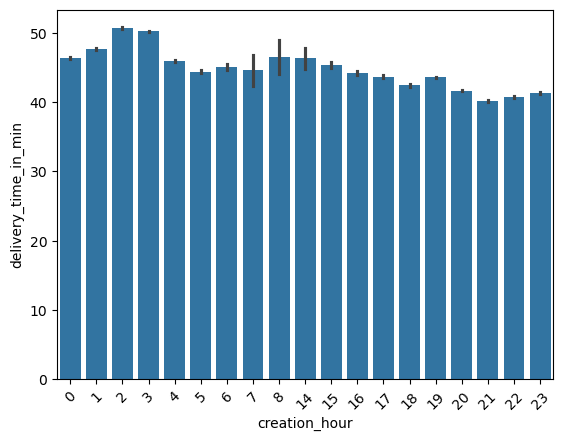

In [172]:
# Show the distribution of time_taken for different hours
plt.xticks(rotation=45)
sns.barplot(x = 'creation_hour',  y = 'delivery_time_in_min', data = dataframe)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

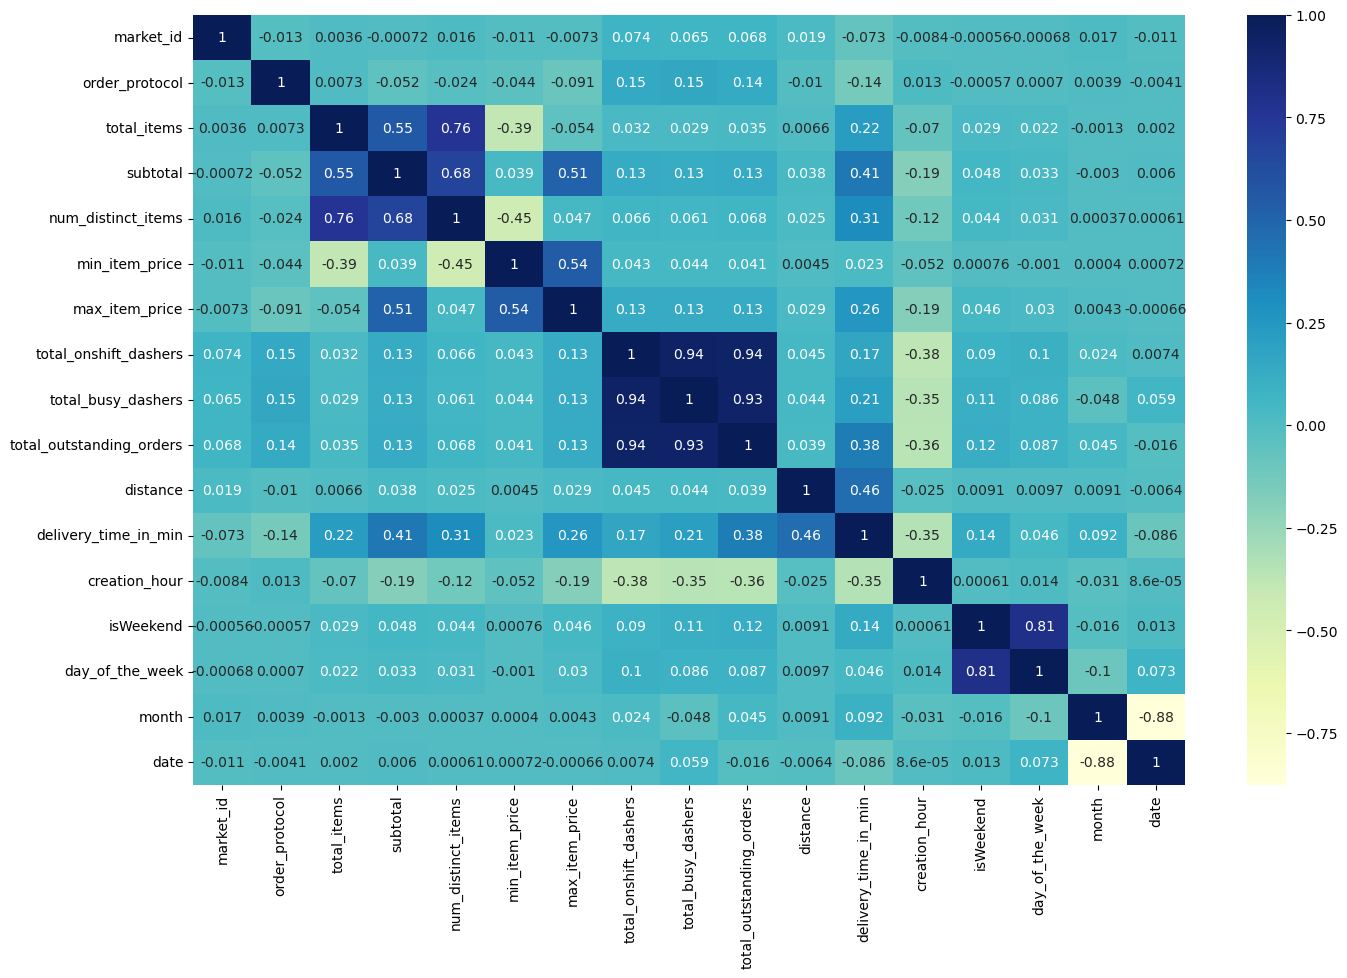

In [173]:
# Plot the heatmap of the correlation matrix
#df_train.corr(numeric_only=True)
#result = df_train.corrwith(y)
#sns.heatmap(result)
plt.figure(figsize = (16, 10))
sns.heatmap(dataframe.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [175]:
# Drop 3-5 weakly correlated columns from training dataset
for_corr = dataframe[['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_outstanding_orders','distance','creation_hour','isWeekend', 'month','day_of_the_week','date']]
for_corr.corrwith(dataframe['delivery_time_in_min'])

market_id                  -0.073016
order_protocol             -0.136755
total_items                 0.224856
subtotal                    0.413267
num_distinct_items          0.312055
min_item_price              0.022753
max_item_price              0.255167
total_onshift_dashers       0.171015
total_outstanding_orders    0.384999
distance                    0.460173
creation_hour              -0.346366
isWeekend                   0.136414
month                       0.091516
day_of_the_week             0.045878
date                       -0.085667
dtype: float64

In [176]:
# identofied columns to drop market_id, order_protocol, min_item_price, creation_hour, total_onshift_dashers
tobedel = ['market_id', 'order_protocol', 'min_item_price'] #'creation_hour'
dataframe = dataframe.drop(tobedel, axis=1)

In [177]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   total_items                175777 non-null  int64         
 1   subtotal                   175777 non-null  int64         
 2   num_distinct_items         175777 non-null  int64         
 3   max_item_price             175777 non-null  int64         
 4   total_onshift_dashers      175777 non-null  float64       
 5   total_busy_dashers         175777 non-null  float64       
 6   total_outstanding_orders   175777 non-null  float64       
 7   distance                   175777 non-null  float64       
 8   created_date_time          175777 non-null  datetime64[ns]
 9   actual_delivery_date_time  175777 non-null  datetime64[ns]
 10  delivery_time_in_min       175777 non-null  float64       
 11  creation_hour              175777 non-null  int32   

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

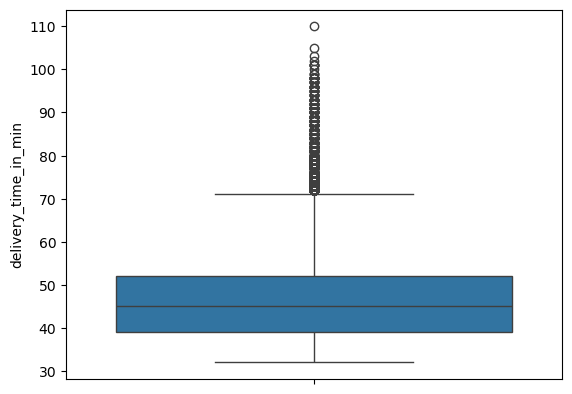

In [178]:
# Boxplot for time_taken
sns.boxplot(dataframe['delivery_time_in_min'])
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [179]:
# Handle outliers
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   total_items                175777 non-null  int64         
 1   subtotal                   175777 non-null  int64         
 2   num_distinct_items         175777 non-null  int64         
 3   max_item_price             175777 non-null  int64         
 4   total_onshift_dashers      175777 non-null  float64       
 5   total_busy_dashers         175777 non-null  float64       
 6   total_outstanding_orders   175777 non-null  float64       
 7   distance                   175777 non-null  float64       
 8   created_date_time          175777 non-null  datetime64[ns]
 9   actual_delivery_date_time  175777 non-null  datetime64[ns]
 10  delivery_time_in_min       175777 non-null  float64       
 11  creation_hour              175777 non-null  int32   

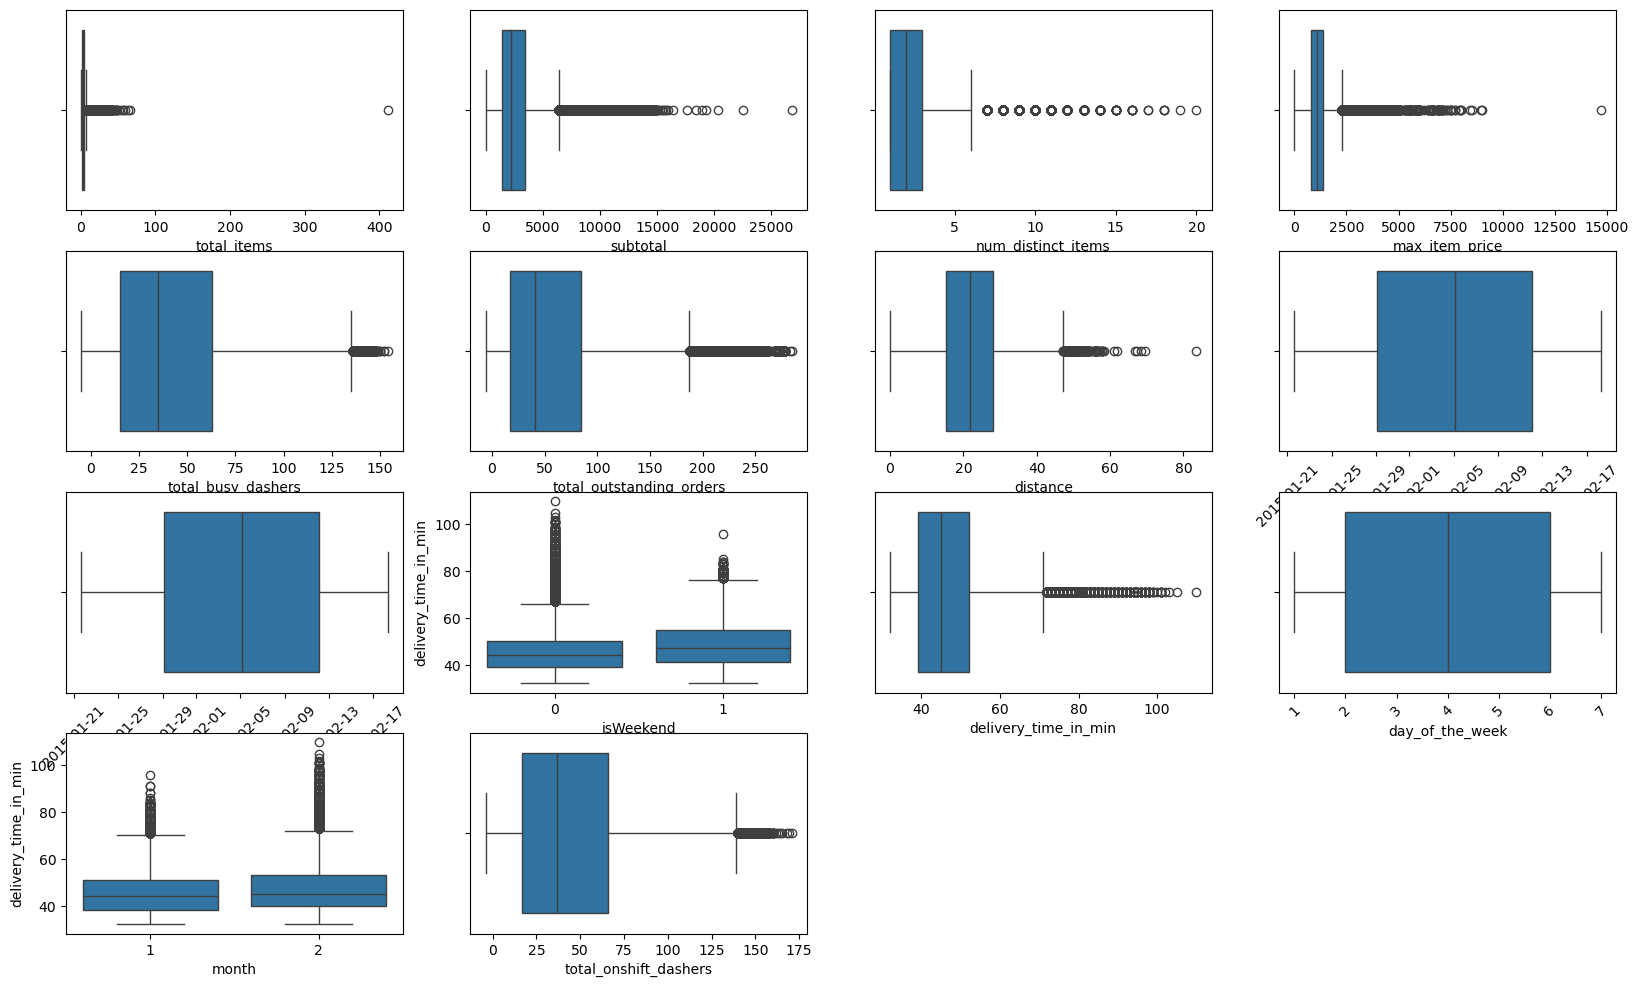

In [180]:
plt.figure(figsize=(20, 12))
plt.subplot(4,4,1)
sns.boxplot(x = 'total_items', data = dataframe)
plt.subplot(4,4,2)
sns.boxplot(x = 'subtotal', data = dataframe)
plt.subplot(4,4,3)
sns.boxplot(x = 'num_distinct_items',data = dataframe)
plt.subplot(4,4,4)
sns.boxplot(x = 'max_item_price', data = dataframe)
plt.subplot(4,4,5)
sns.boxplot(x = 'total_busy_dashers', data = dataframe)
plt.subplot(4,4,6)
sns.boxplot(x = 'total_outstanding_orders', data = dataframe)
plt.subplot(4,4,7)
sns.boxplot(x = 'distance', data = dataframe)
plt.subplot(4,4,8)
plt.xticks(rotation=45)
sns.boxplot(x = 'created_date_time', data = dataframe)
plt.subplot(4,4,9)
plt.xticks(rotation=45)
sns.boxplot(x = 'actual_delivery_date_time',data = dataframe)
plt.subplot(4,4,10)
sns.boxplot(x = 'isWeekend', y='delivery_time_in_min',data = dataframe)
plt.subplot(4,4,11)
sns.boxplot(x = 'delivery_time_in_min',data = dataframe)
plt.subplot(4,4,12)
plt.xticks(rotation=45)
sns.boxplot(x = 'day_of_the_week',data = dataframe)
plt.subplot(4,4,13)
sns.boxplot(x = 'month',y='delivery_time_in_min',data = dataframe)
plt.subplot(4,4,14)
sns.boxplot(x = 'total_onshift_dashers',data = dataframe)
plt.show()

In [181]:
#total_items
dataframe[dataframe['total_items'] >45]['total_items'].count()
indextodel = dataframe[dataframe['total_items'] >45]['total_items'].index #
dataframe.drop(indextodel, inplace=True)

In [182]:
#subtotal
dataframe[dataframe['subtotal'] > 15000].count()
indextodel = dataframe[dataframe['subtotal'] > 15000].index #15 entries
dataframe.drop(indextodel, inplace=True)

In [183]:
#num_distinct_items
dataframe[dataframe['num_distinct_items'] > 15].count()
indextodel = dataframe[dataframe['num_distinct_items'] > 15].index # 
dataframe.drop(indextodel, inplace=True)

In [184]:
#max_item_price
dataframe[dataframe['max_item_price'] > 8000].count()
indextodel = dataframe[dataframe['max_item_price'] > 8000].index # 134 entries
dataframe.drop(indextodel, inplace=True)

In [185]:
#total_busy_dashers
dataframe[dataframe['total_busy_dashers'] > 150].count()
indextodel = dataframe[dataframe['total_busy_dashers'] > 150].index # 816
dataframe.drop(indextodel, inplace=True)

In [186]:
#total_outstanding_orders
dataframe[dataframe['total_outstanding_orders'] > 280].count() 
indextodel = dataframe[dataframe['total_outstanding_orders'] > 280].index # 2171
dataframe.drop(indextodel, inplace=True)

In [187]:
#distance
dataframe[dataframe['distance'] > 60].count()
indextodel = dataframe[dataframe['distance'] > 60].index # 28 entries of 1197718
dataframe.drop(indextodel, inplace=True)

In [188]:
#created_date_time and actual_delivery_date_time no outliers

In [189]:
#isWeekend
dataframe['isWeekend'].count() # 119696
dataframe[dataframe['isWeekend'] > 50].count() # already handled by other field outlier cleanup

total_items                  0
subtotal                     0
num_distinct_items           0
max_item_price               0
total_onshift_dashers        0
total_busy_dashers           0
total_outstanding_orders     0
distance                     0
created_date_time            0
actual_delivery_date_time    0
delivery_time_in_min         0
creation_hour                0
isWeekend                    0
day_of_the_week              0
month                        0
date                         0
dtype: int64

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [190]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Numerical : total_items, subtotal, num_distinct_items, max_item_price, total_busy_dashers, total_outstanding_orders, distance, isWeeked
# Categorical: created_date_time, actual_delivery_date_time


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [191]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [192]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [193]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [194]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [195]:
# Drop the weakly correlated columns from training dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175719 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   total_items                175719 non-null  int64         
 1   subtotal                   175719 non-null  int64         
 2   num_distinct_items         175719 non-null  int64         
 3   max_item_price             175719 non-null  int64         
 4   total_onshift_dashers      175719 non-null  float64       
 5   total_busy_dashers         175719 non-null  float64       
 6   total_outstanding_orders   175719 non-null  float64       
 7   distance                   175719 non-null  float64       
 8   created_date_time          175719 non-null  datetime64[ns]
 9   actual_delivery_date_time  175719 non-null  datetime64[ns]
 10  delivery_time_in_min       175719 non-null  float64       
 11  creation_hour              175719 non-null  int32        

In [277]:
# Define target variable (y) and features (X) delaying this untill EDS is done as X,y length does not match
df_train, df_test = train_test_split(dataframe, train_size = 0.7, test_size = 0.3, random_state = 100)

y = df_train.pop('delivery_time_in_min')
X = df_train
#[['total_items', 'subtotal', 'num_distinct_items','max_item_price','total_outstanding_orders','distance','isWeekend']]

In [278]:
# Split data into training and testing sets delaying this untill EDS is done as X,y length does not match


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [279]:
# Import libraries
import statsmodels.api as sm  
from sklearn.preprocessing import StandardScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [280]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
cols = ['total_items', 'subtotal', 'num_distinct_items','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance','isWeekend','day_of_the_week','month','creation_hour','date']
numeric_features = X[cols]
model = scaler.fit(X[cols])
scaled_data = model.transform(X[cols])
                              #[['total_items', 'subtotal', 'num_distinct_items','max_item_price','total_outstanding_orders','distance','isWeekend']])

# print scaled features
print(scaled_data)

[[-0.07891376  0.65960876  0.20223327 ...  0.73731598 -0.63203715
   0.1760108 ]
 [-0.48995033 -0.32087777 -0.4142855  ... -1.35627061 -0.86233334
   1.04287624]
 [ 0.74315939  1.0151036   1.43527081 ... -1.35627061  1.32548044
   1.69302532]
 ...
 [-0.9009869  -1.11896094 -1.03080427 ...  0.73731598  1.32548044
  -0.25742192]
 [-0.48995033 -0.51642732 -0.4142855  ... -1.35627061 -0.74718524
   0.7178017 ]
 [ 0.33212282 -0.44357552  0.20223327 ...  0.73731598  1.44062853
  -0.79921283]]


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [281]:
# Create/Initialise the model
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X[cols])

# Create a first fitted model
lr = sm.OLS(list(y), X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 5.971e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:45:19   Log-Likelihood:            -3.2669e+05
No. Observations:              123003   AIC:                         6.534e+05
Df Residuals:                  122989   BIC:                         6.535e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,146.11
5,total_onshift_dashers,12.64
6,total_busy_dashers,12.33
7,total_outstanding_orders,10.30
11,month,4.60
13,date,4.38
3,num_distinct_items,3.82
2,subtotal,3.60
1,total_items,3.53
10,day_of_the_week,3.10


In [283]:
# Train the model using the training data


In [284]:
# Make predictions
y_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Rediduals')

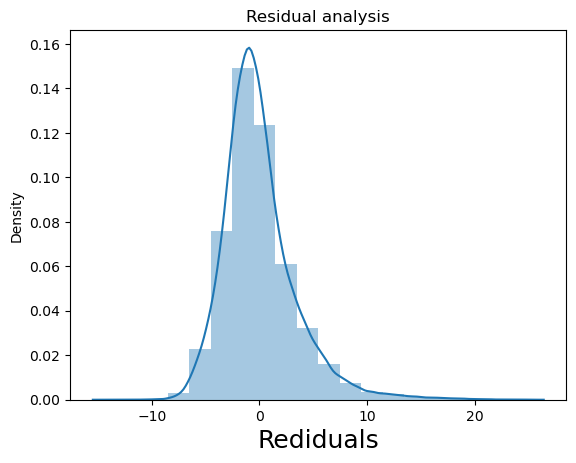

In [292]:
# Find results for evaluation metrics
# Plot the histogram of the error terms
fig = plt.figure()
plt.title("Residual analysis")
sns.distplot((y - y_pred), bins = 20)
plt.xlabel('Rediduals', fontsize = 18)                         # X-label


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [286]:
# Loop through the number of features and test the model
#remove totalitems from list
col1 = ['subtotal','num_distinct_items','max_item_price','distance','isWeekend','day_of_the_week','month','total_outstanding_orders','creation_hour','date','total_busy_dashers']
X_train_lm1 = sm.add_constant(X[col1])

# Create a first fitted model

lr = sm.OLS(list(y), X_train_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 2.878e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:45:35   Log-Likelihood:            -3.7072e+05
No. Observations:              123003   AIC:                         7.415e+05
Df Residuals:                  122991   BIC:                         7.416e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Text(0.5, 0, 'Errors')

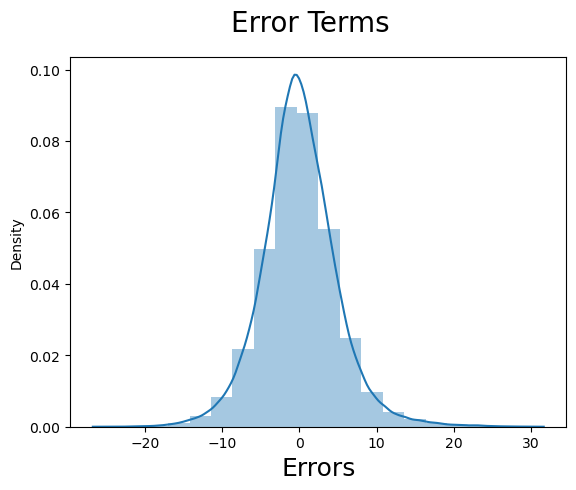

In [287]:
y_pred1 = lr.predict(X_train_lm1)
# Find results for evaluation metrics
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [288]:
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,143.89
8,total_outstanding_orders,8.34
11,total_busy_dashers,8.26
7,month,4.51
10,date,4.35
1,subtotal,3.27
6,day_of_the_week,2.95
5,isWeekend,2.93
2,num_distinct_items,2.43
3,max_item_price,1.78


In [289]:
# Build the final model with selected number of features
col2 = ['subtotal','num_distinct_items','max_item_price','distance','isWeekend','day_of_the_week','month','total_outstanding_orders','creation_hour','date']
X_train_lm2 = sm.add_constant(X[col2])

# Create a first fitted model

lr = sm.OLS(list(y), X_train_lm2).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                 1.350e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:            -4.0348e+05
No. Observations:              123003   AIC:                         8.070e+05
Df Residuals:                  122992   BIC:                         8.071e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 0, 'Residuals')

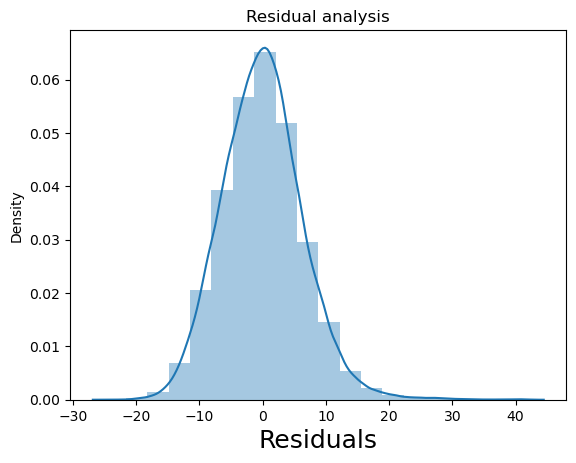

In [290]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_pred2 = lr.predict(X_train_lm2)

fig = plt.figure()
plt.title("Residual analysis")
sns.distplot((y - y_pred2), bins = 20)
#fig.suptitle('Frequency', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                         # X-label
#%matplotlib inline

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [291]:
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,139.87
7,month,4.41
10,date,4.35
1,subtotal,3.27
6,day_of_the_week,2.94
5,isWeekend,2.93
2,num_distinct_items,2.43
3,max_item_price,1.78
9,creation_hour,1.20
8,total_outstanding_orders,1.18


Text(0, 0.5, 'Residual')

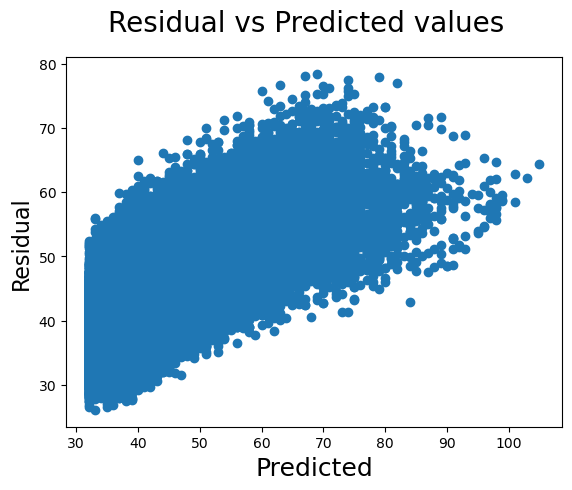

In [275]:
# Compare the scaled vs unscaled features used in the final model
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y= y_pred1,x= y)
fig.suptitle('Residual vs Predicted values', fontsize=20)              # Plot heading 
plt.xlabel('Predicted', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)   # Y-label

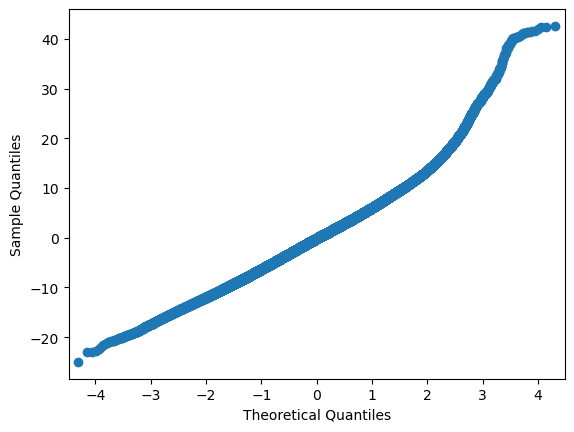

In [276]:
import statsmodels.api as sm 
import pylab as py 
#data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot((y - y_pred1), line=0) 
py.show() 

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>